- look at variable values (missing, extreme min or max that don't make sense). filter or average substitution
Checked

- rank variables by information gain on log price
Not sure how to do it

- look at correlations between variables
Done

- sanity check or shortlist ones we know don't make sense (won't have both lat,long and zip, or exclude reviews)
Done

transformed some variables. amenties, city and neighbourhood are left for discusion


In [1]:
%matplotlib inline

In [68]:
import csv
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [49]:

#for i in df['amenities']:
 #   print(i)
    
len(df['amenities'])

74111

In [69]:
df['Airconditioning'] = df['amenities'].map(lambda x: True if x.find('Air conditioning') > 0 else False)
df['Wireless Internet'] = df['amenities'].map(lambda x: True if x.find('Wireless Internet') > 0 else False)
df['Kitchen'] = df['amenities'].map(lambda x: True if x.find('Kitchen') > 0 else False)
df['Heating'] = df['amenities'].map(lambda x: True if x.find('Heating') > 0 else False)
df['TV'] = df['amenities'].map(lambda x: True if x.find('TV') > 0 else False)
df['Cable TV'] = df['amenities'].map(lambda x: True if x.find('Cable TV') > 0 else False)
df['Pool'] = df['amenities'].map(lambda x: True if x.find('Pool') > 0 else False)
df['Breakfast'] = df['amenities'].map(lambda x: True if x.find('Breakfast') > 0 else False)

In [70]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,bedrooms,beds,Airconditioning,Wireless Internet,Kitchen,Heating,TV,Cable TV,Pool,Breakfast
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,1.0,1.0,True,True,True,True,False,False,False,False
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,3.0,3.0,True,True,True,True,False,False,False,False
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1.0,3.0,True,True,True,True,True,True,False,True
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,2.0,2.0,False,True,True,True,True,True,False,False
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,0.0,1.0,True,True,True,True,True,False,False,False


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 37 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [71]:
# exclude variables that are meaningless or are out of this project's scope
df = df.drop(['id', 'thumbnail_url','zipcode','amenities', 'latitude', 'longitude', 'name', 'description'], axis=1)

In [72]:
# exclude variables that do not exist at the initial listing
df = df.drop(['first_review', 'last_review', 'number_of_reviews', 'review_scores_rating', 'host_response_rate', 'host_since'], axis=1)

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 24 columns):
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
instant_bookable          74111 non-null object
neighbourhood             67239 non-null object
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
Airconditioning           74111 non-null bool
Wireless Internet         74111 non-null bool
Kitchen                   7411

In [73]:
# transform categorical variables
df['property_type'] = df['property_type'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['bed_type'] = df['bed_type'].astype('category')
df['cancellation_policy'] = df['cancellation_policy'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['property_type'].describe()


count         74111
unique           35
top       Apartment
freq          49003
Name: property_type, dtype: object

In [62]:
df['neighbourhood']

0          Brooklyn Heights
1            Hell's Kitchen
2                    Harlem
3              Lower Haight
4          Columbia Heights
5                Noe Valley
6                       NaN
7                  Downtown
8         Richmond District
9                       NaN
10            Alphabet City
11            Hermosa Beach
12                 Torrance
13        U Street Corridor
14                      NaN
15            Humboldt Park
16              Wicker Park
17             South Boston
18          Lower East Side
19                 Flatbush
20             Sherman Oaks
21            East Flatbush
22                 Downtown
23              Valley Glen
24            Dupont Circle
25                  Jamaica
26                      NaN
27             Forest Hills
28                      NaN
29              Murray Hill
                ...        
74081       North Hollywood
74082        Bernal Heights
74083          Russian Hill
74084          Williamsburg
74085              K

In [86]:
df['room_type'].describe()

count               74111
unique                  3
top       Entire home/apt
freq                41310
Name: room_type, dtype: object

In [87]:
df['cancellation_policy'].describe()

count      74111
unique         5
top       strict
freq       32374
Name: cancellation_policy, dtype: object

In [88]:
df['bed_type'].describe()

count        74111
unique           5
top       Real Bed
freq         72028
Name: bed_type, dtype: object

In [54]:
df['neighbourhood'].describe()

count            67239
unique             619
top       Williamsburg
freq              2862
Name: neighbourhood, dtype: object

In [51]:
# code for making dummies from the author
for categorical_feature in ['cancellation_policy', 'property_type', 'room_type', 'bed_type']:
    features = pd.concat([features, pd.get_dummies(features[categorical_feature])], axis=1)

NameError: name 'features' is not defined

In [74]:
# transform true/false features to binary
df['host_has_profile_pic'] = df['host_has_profile_pic'].map(lambda x: 0 if x == "f" else 1)
df['host_identity_verified'] = df['host_identity_verified'].map(lambda x: 0 if x == "f" else 1)
df['instant_bookable'] = df['instant_bookable'].map(lambda x: 0 if x == "f" else 1)
df['cleaning_fee'] = df['cleaning_fee'].map(lambda x: 0 if x == False else 1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 16 columns):
log_price                 74111 non-null float64
property_type             74111 non-null category
room_type                 74111 non-null category
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null category
cancellation_policy       74111 non-null category
cleaning_fee              74111 non-null int64
city                      74111 non-null object
host_has_profile_pic      74111 non-null int64
host_identity_verified    74111 non-null int64
instant_bookable          74111 non-null int64
neighbourhood             67239 non-null object
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
dtypes: category(4), float64(4), int64(5), object(3)
memory usage: 7.1+ MB


In [57]:
df.describe()

,log_price,accommodates,bathrooms,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,1.265793,1.710868
std,0.717394,2.153589,0.582044,0.852143,1.254142
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,10.000000,18.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDF0216E10>,
      dtype=object)

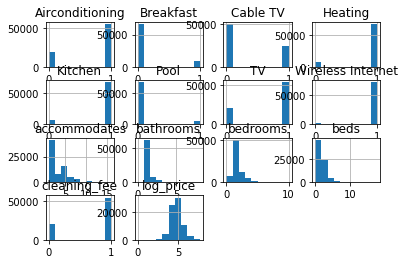

In [58]:
df.hist()

In [92]:
df.corr()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,bedrooms,beds
log_price,1.000000,0.567574,0.355420,0.111191,-0.013171,0.024014,-0.044271,0.473212,0.442153
accommodates,0.567574,1.000000,0.505632,0.182306,-0.003970,0.057689,0.053093,0.709258,0.810801
bathrooms,0.355420,0.505632,1.000000,0.053784,-0.003299,0.014222,0.001461,0.589935,0.525591
cleaning_fee,0.111191,0.182306,0.053784,1.000000,0.022654,0.162285,0.010031,0.105454,0.131632
host_has_profile_pic,-0.013171,-0.003970,-0.003299,0.022654,1.000000,0.075312,-0.009280,0.000595,-0.000262
host_identity_verified,0.024014,0.057689,0.014222,0.162285,0.075312,1.000000,-0.087729,0.025577,0.035445
instant_bookable,-0.044271,0.053093,0.001461,0.010031,-0.009280,-0.087729,1.000000,-0.003654,0.051354
bedrooms,0.473212,0.709258,0.589935,0.105454,0.000595,0.025577,-0.003654,1.000000,0.709416
beds,0.442153,0.810801,0.525591,0.131632,-0.000262,0.035445,0.051354,0.709416,1.000000


Text(0.5, 1.0, 'Histogram of Log of Price')

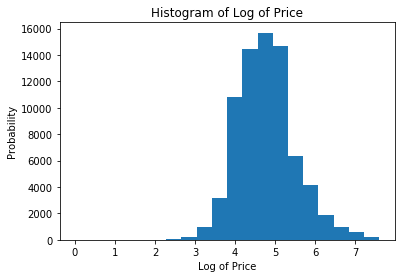

In [7]:
# Target variable distribution
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['log_price'], bins = 20)
plt.xlabel('Log of Price')
plt.ylabel('Probability')
plt.title('Histogram of Log of Price')

(array([5.9983e+04, 1.0264e+04, 2.0840e+03, 7.7000e+02, 5.2200e+02,
        8.6000e+01, 1.6400e+02, 1.5000e+02, 4.4000e+01, 4.4000e+01]),
 array([1.0000e+00, 2.0080e+02, 4.0060e+02, 6.0040e+02, 8.0020e+02,
        1.0000e+03, 1.1998e+03, 1.3996e+03, 1.5994e+03, 1.7992e+03,
        1.9990e+03]),
 <a list of 10 Patch objects>)

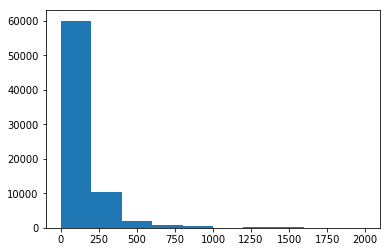

In [8]:
# Original Price
import numpy
price = numpy.exp(df['log_price'])
plt.hist(price, bins = 10)

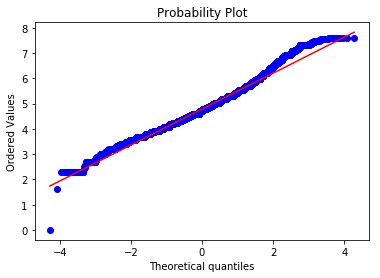

In [13]:
from scipy import stats
stats.probplot(df['log_price'], plot=plt)
plt.show()

In [14]:
feature_importance = gbm.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], X.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

NameError: name 'gbm' is not defined

In [ ]:
# Calculates the information gain (reduction in entropy) that would result by splitting the data on the chosen attribute (attr).
def gain(data, attr, target_attr):
 
    val_freq = {}
    subset_entropy = 0.0
 
    # Calculate the frequency of each of the values in the target attribute
    for record in data:
        if (val_freq.has_key(record[attr])):
            val_freq[record[attr]] += 1.0
        else:
            val_freq[record[attr]]  = 1.0
 
    # Calculate the sum of the entropy for each subset of records weighted by their probability of occuring in the training set.
    for val in val_freq.keys():
        val_prob = val_freq[val] / sum(val_freq.values())
        data_subset = [record for record in data if record[attr] == val]
        subset_entropy += val_prob * entropy(data_subset, target_attr)
 
    # Subtract the entropy of the chosen attribute from the entropy of the whole data set with respect to the target attribute (and return it)
    return (entropy(data, target_attr) - subset_entropy)

In [52]:
df.corr()

,log_price,accommodates,bathrooms,cleaning_fee,bedrooms,beds,Airconditioning,Wireless Internet,Kitchen,Heating,TV,Cable TV,Pool,Breakfast
log_price,1.000000,0.567574,0.355420,0.111191,0.473212,0.442153,0.053824,0.034074,0.101046,0.103929,0.272770,0.237680,0.074778,-0.016585
accommodates,0.567574,1.000000,0.505632,0.182306,0.709258,0.810801,0.102006,0.049447,0.101110,0.102925,0.214161,0.183118,0.078551,0.012699
bathrooms,0.355420,0.505632,1.000000,0.053784,0.589935,0.525591,0.045494,0.030791,0.070865,0.053127,0.117512,0.134798,0.118681,0.018982
cleaning_fee,0.111191,0.182306,0.053784,1.000000,0.105454,0.131632,0.068295,0.126533,0.075121,0.132342,0.107909,0.103717,0.031665,-0.013285
bedrooms,0.473212,0.709258,0.589935,0.105454,1.000000,0.709416,0.037905,0.039306,0.097532,0.070136,0.145495,0.148051,0.049926,-0.002263
beds,0.442153,0.810801,0.525591,0.131632,0.709416,1.000000,0.074885,0.038280,0.083414,0.083495,0.164021,0.161152,0.065079,0.022916
Airconditioning,0.053824,0.102006,0.045494,0.068295,0.037905,0.074885,1.000000,0.177712,0.148137,0.264937,0.166771,0.095822,0.103286,0.039285
Wireless Internet,0.034074,0.049447,0.030791,0.126533,0.039306,0.038280,0.177712,1.000000,0.271491,0.302439,0.199410,0.111244,0.025026,0.032713
Kitchen,0.101046,0.101110,0.070865,0.075121,0.097532,0.083414,0.148137,0.271491,1.000000,0.221393,0.170535,0.077314,0.038862,0.005715
Heating,0.103929,0.102925,0.053127,0.132342,0.070136,0.083495,0.264937,0.302439,0.221393,1.000000,0.200927,0.135583,0.032496,0.045782


In [75]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [108]:
X = df.values[:,15:23]
y = df.values[:,1]
X.shape

(74111, 8)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 23 columns):
log_price                 74111 non-null float64
property_type             74111 non-null category
room_type                 74111 non-null category
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null category
cancellation_policy       74111 non-null category
cleaning_fee              74111 non-null int64
city                      74111 non-null object
host_has_profile_pic      74111 non-null int64
host_identity_verified    74111 non-null int64
instant_bookable          74111 non-null int64
neighbourhood             67239 non-null category
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
Airconditioning           74111 non-null bool
Wireless Internet         74111 non-null bool
Kitchen                   74111 non-null bool
Heating                 

In [109]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  


array([0.17656098, 0.02749804, 0.43869237, 0.03814521, 0.0376753 ,
       0.10311768, 0.03152993, 0.14678049])

In [95]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape        
#print(model.get_support()) 

(74111, 2)

In [101]:
X_new.

<function ndarray.tostring>